In [140]:
import numpy as np
import pandas as pd
from   mmd                 import MMD_torch
#import os
from sklearn import preprocessing
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.regularizers import l2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
import torch
import torchvision.models  as models
import torch.nn            as nn
import torch.optim         as optim
import matplotlib.pyplot   as plt
from   tqdm                import tqdm
from   torch.utils.data    import DataLoader, TensorDataset

from sklearn.mixture import GaussianMixture
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 1- Data visualisation

In [141]:
# Load the Data: train and test
adult_train = np.load('adult_train.npz')
adult_test = np.load('adult_test.npz')

In [160]:
#Read and associate rows and columns
x = adult_train['x']
df = pd.DataFrame(x)
df.head()
data = pd.read_csv('adult_headers.txt', header=None) # lire les donnees text
data.columns = ['headers']
lists = []
for header in data['headers']:
    lists.append(header)
df.columns = lists[:len(lists)-1]# retirer la derniere ligne
df.head()

,age_u20,age_u30,age_u40,age_u50,age_u60,age_u70,age_u80,workclass_Private,workclass_Self-emp-not-inc,workclass_Self-emp-inc,...,country_Nicaragua,country_Scotland,country_Thailand,country_Yugoslavia,country_El-Salvador,country_Trinadad&Tobago,country_Peru,country_Hong,country_Holand-Netherlands,country_?
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [161]:
y = adult_train['y']
dy = pd.DataFrame(y)
dy.columns = [lists[len(lists)-1]]# associer la derniere ligne a y
dy.head()

,income
0,0.0
1,0.0
2,1.0
3,1.0
4,0.0


In [162]:
a = adult_train['a']
da = pd.DataFrame(a)
da.columns = ['A']
da.head()

,A
0,0.0
1,0.0
2,1.0
3,1.0
4,0.0


In [163]:
x = adult_test['x']
dxt = pd.DataFrame(x)
dxt.head()
data = pd.read_csv('adult_headers.txt', header=None)
data.columns = ['headers']
liste = []
for header in data['headers']:
    liste.append(header)
dxt.columns = liste[:len(liste)-1]
dxt.head()

,age_u20,age_u30,age_u40,age_u50,age_u60,age_u70,age_u80,workclass_Private,workclass_Self-emp-not-inc,workclass_Self-emp-inc,...,country_Nicaragua,country_Scotland,country_Thailand,country_Yugoslavia,country_El-Salvador,country_Trinadad&Tobago,country_Peru,country_Hong,country_Holand-Netherlands,country_?
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
y = adult_test['y']
dyt = pd.DataFrame(y)
dyt.columns = [liste[len(liste)-1]]
dyt.head()

,income
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [165]:
a = adult_test['a']
dat = pd.DataFrame(a)
dat.columns = ['A']
dat.head()

,A
0,0.0
1,1.0
2,1.0
3,0.0
4,1.0


# Correlation on the train

#  Name the 10 features which are most correlated with Y on the train

In [166]:
#concatenation of the two Dataframe 'x' and 'y'
frames = [df,dy]
result = pd.concat(frames, axis=1)
result.shape
#correlation between x and y
corr_dfdy = result.corr()

In [167]:
corr_income = corr_dfdy['income'].abs()
correlation1 = corr_income.sort_values(ascending= False)[1:11]
correlation1.index

Index(['marital-status_Married-civ-spouse', 'relationship_Husband',
       'education_num', 'marital-status_Never-married', 'age_u30',
       'hours-per-week', 'relationship_Own-child', 'capital-gain',
       'sex_Female', 'sex_Male'],
      dtype='object')

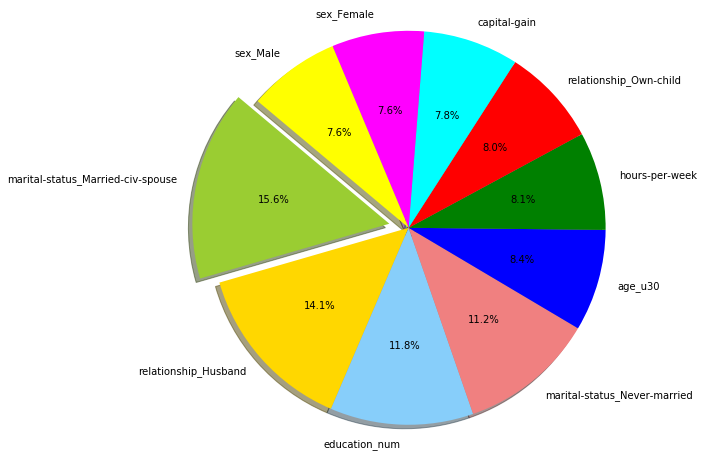

In [168]:
plt.figure(figsize=(8,8))
labels = list(correlation1.index) 
sizes = list(correlation1.get_values())
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral',  'blue', 'green', 'red', 'cyan', 'magenta', 'yellow']
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

# Name the 10 features which are most correlated with A

In [169]:
#concatenation of the two Dataframe 'x' and 'A'
frames1 = [df,da]
result1 = pd.concat(frames1, axis=1)
result1.shape
#correlation between x and A
corr_dfda = result1.corr()

In [170]:
corr_income1 = corr_dfda['A'].abs()
corr_var_A_x = corr_income1.sort_values(ascending= False)[1:11]
corr_var_A_x.index

Index(['sex_Female', 'sex_Male', 'relationship_Husband',
       'marital-status_Married-civ-spouse', 'relationship_Unmarried',
       'relationship_Wife', 'occupation_Adm-clerical', 'hours-per-week',
       'marital-status_Divorced', 'occupation_Craft-repair'],
      dtype='object')

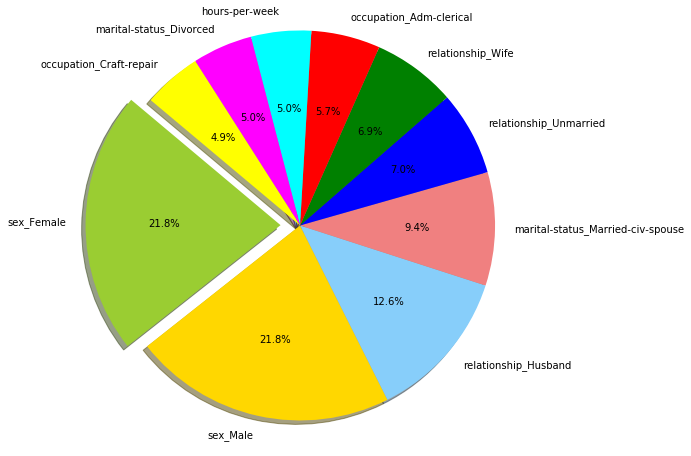

In [171]:
plt.figure(figsize=(8,8))
labels = list(corr_var_A_x.index) 
sizes = list(corr_var_A_x.get_values()) #[215, 130, 245, 210]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral',  'blue', 'green', 'red', 'cyan', 'magenta', 'yellow']
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

 # Correlation on the test

In [172]:
#concatenation of the two Dataframe 'x' and 'y'
frames3 = [dxt,dyt]
result3 = pd.concat(frames3, axis=1)
result3.shape
#correlation between x and y
corr_dxtdyt = result3.corr()

In [173]:
corr_income3 = corr_dxtdyt['income'].abs()
correlation2 = corr_income3.sort_values(ascending= False)[1:11]
correlation2.index

Index(['marital-status_Married-civ-spouse', 'relationship_Husband',
       'education_num', 'marital-status_Never-married', 'age_u30',
       'hours-per-week', 'capital-gain', 'relationship_Own-child',
       'sex_Female', 'sex_Male'],
      dtype='object')

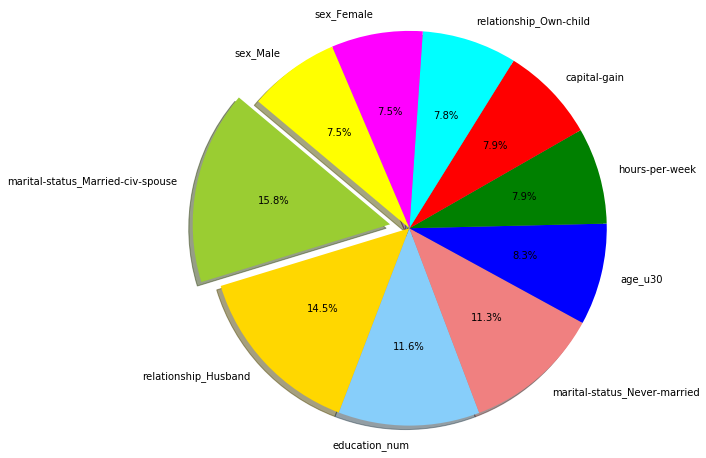

In [174]:
plt.figure(figsize=(8,8))
labels = list(correlation2.index) 
sizes = list(correlation2.get_values()) #[215, 130, 245, 210]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral',  'blue', 'green', 'red', 'cyan', 'magenta', 'yellow']
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

# Name the 10 features which are most correlated with A

In [175]:
#concatenation of the two Dataframe 'x' and 'A'
frames2 = [dxt,dat]
result2 = pd.concat(frames2, axis=1)
result2.shape
#correlation between x and A
corr_dxtdat = result2.corr()

In [176]:
corr_income2 = corr_dxtdat['A'].abs()
corr_var_A_xt = corr_income2.sort_values(ascending= False)[1:11]
corr_var_A_xt.index

Index(['sex_Female', 'sex_Male', 'relationship_Husband',
       'marital-status_Married-civ-spouse', 'relationship_Wife',
       'relationship_Unmarried', 'occupation_Adm-clerical',
       'marital-status_Divorced', 'hours-per-week', 'occupation_Craft-repair'],
      dtype='object')

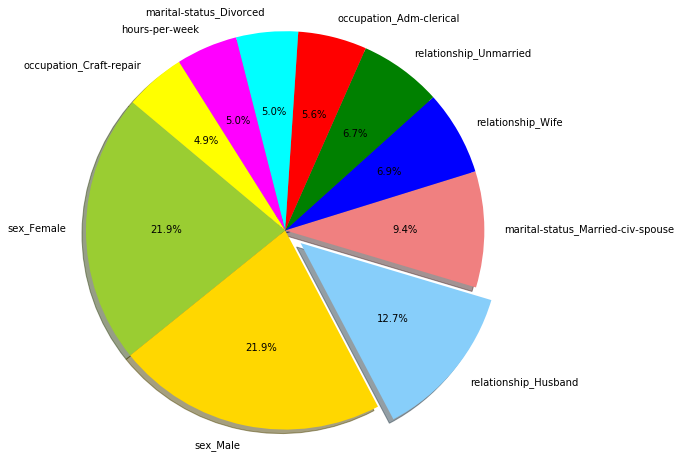

In [177]:
plt.figure(figsize=(8,8))
labels = list(corr_var_A_xt.index) 
sizes = list(corr_var_A_xt.get_values()) 
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral',  'blue', 'green', 'red', 'cyan', 'magenta', 'yellow']
explode = (0, 0, 0.1, 0, 0, 0, 0, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

## 2- Train a binary classifier to predict Y
## Logistic Regression

In [178]:
# Logistic Regression
x_train = adult_train['x']
y_train = adult_train['y']
x_test = adult_test['x']
y_test = adult_test['y']
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [179]:
predicted_classes = model.predict(x_test)
score = model.score(x_test,y_test)
print(score)

0.8569498188071986


## Neural Network

In [180]:
# Neural Ntework 
# define a sequential model
model_n = Sequential()

# add model layers

n_cols = x_train.shape[1]

model_n.add(Dense(500, activation ='relu', input_dim = n_cols))
model_n.add(Dense(500,activation ='relu'))
model_n.add(Dense(500, activation='relu'))

model_n.add(Dense(1, activation='sigmoid'))

# compile model_n using as a measure of performance

model_n.compile(optimizer= 'adam', loss ='binary_crossentropy', metrics=['accuracy'])

#train model
model_n.fit(x_train, y_train, batch_size = 128, epochs = 100)

score = model_n.evaluate(x_test, y_test, batch_size = 128)

Epoch 1/100
32561/32561 [==============================] - 2s 76us/step - loss: 1.5299 - acc: 0.7826
Epoch 2/100
32561/32561 [==============================] - 2s 64us/step - loss: 1.4865 - acc: 0.7965
Epoch 3/100
32561/32561 [==============================] - 2s 65us/step - loss: 1.4828 - acc: 0.7994
Epoch 4/100
32561/32561 [==============================] - 2s 67us/step - loss: 1.4799 - acc: 0.8019
Epoch 5/100
32561/32561 [==============================] - 2s 65us/step - loss: 1.4791 - acc: 0.7998
Epoch 6/100
32561/32561 [==============================] - 2s 65us/step - loss: 1.4779 - acc: 0.8016
Epoch 7/100
32561/32561 [==============================] - 2s 65us/step - loss: 1.4762 - acc: 0.8017
Epoch 8/100
32561/32561 [==============================] - 2s 65us/step - loss: 1.4759 - acc: 0.8018
Epoch 9/100
32561/32561 [==============================] - 2s 68us/step - loss: 1.4762 - acc: 0.8018
Epoch 10/100
32561/32561 [==============================] - 2s 66us/step - loss: 1.4759 - a

In [186]:
model_n.evaluate(x_test, y_test)

16281/16281 [==============================] - 0s 30us/step


[1.712859742040021, 0.784656962095743]

## Function accuray

In [187]:
def accuracy(label, prediction):
    return np.count_nonzero(label == prediction)/(label.shape[0])

In [188]:
y_hate1 = model_n.predict_classes(x_test)
accuracy_score = accuracy(y_test,y_hate1)
accuracy_score

0.7846569621030649

# Report classification accuracy and ∆DP on the test set for your trained classifier

In [189]:
def delta_DP(prediction, A):
    n_A_0 = np.count_nonzero(A==0)
    n_A_1 = np.count_nonzero(A==1)
    part1 = np.sum(prediction[np.where(A ==0)[0]])
    part2 = np.sum(prediction[np.where(A==1)[0]])
    return np.abs( part1/n_A_0 - part2/n_A_1 )

In [190]:
delta_DP(y_hate1, adult_test['a'])

0.11610169577894845

# Remove the 10 attributes that you identified in the first part as being most highly correlated with A, and retrain.

In [191]:
# Remove on train
df_remove = df.drop(corr_var_A_x.index, axis=1)
df_remove.shape

(32561, 103)

In [192]:
#Remove on test
dxt_remove = dxt.drop(corr_var_A_xt.index, axis=1)
dxt_remove.shape

(16281, 103)

##  Retrain

In [193]:
# Retrain
# Neural Ntework 
# define a sequential model
model_n = Sequential()

# add model layers

n_cols = df_remove.shape[1]

model_n.add(Dense(500, activation ='relu', input_dim = n_cols))
model_n.add(Dense(500,activation ='relu'))
model_n.add(Dense(500, activation='relu'))

model_n.add(Dense(1, activation='sigmoid'))

# compile model_n using as a measure of performance

model_n.compile(optimizer= 'adam', loss ='binary_crossentropy', metrics=['accuracy'])

#train model
model_n.fit(df_remove, y_train, batch_size = 128, epochs = 100)

Epoch 1/100
32561/32561 [==============================] - 3s 77us/step - loss: 1.5159 - acc: 0.7838
Epoch 2/100
32561/32561 [==============================] - 2s 64us/step - loss: 1.5026 - acc: 0.7902
Epoch 3/100
32561/32561 [==============================] - 2s 65us/step - loss: 1.5006 - acc: 0.7910
Epoch 4/100
32561/32561 [==============================] - 2s 64us/step - loss: 1.4987 - acc: 0.7914
Epoch 5/100
32561/32561 [==============================] - 2s 64us/step - loss: 1.4958 - acc: 0.7924
Epoch 6/100
32561/32561 [==============================] - 2s 67us/step - loss: 1.4933 - acc: 0.7942
Epoch 7/100
32561/32561 [==============================] - 2s 68us/step - loss: 1.4921 - acc: 0.7930
Epoch 8/100
32561/32561 [==============================] - 2s 67us/step - loss: 1.4886 - acc: 0.7944
Epoch 9/100
32561/32561 [==============================] - 2s 65us/step - loss: 1.4862 - acc: 0.7966
Epoch 10/100
32561/32561 [==============================] - 2s 64us/step - loss: 1.4835 - a

In [194]:
model_n.evaluate(dxt_remove, y_test, batch_size = 128)

16281/16281 [==============================] - 0s 25us/step


[1.7703365950135463, 0.78312142985465]

# Report accuracy

In [195]:
# Report accuracy
y_hate2 = model_n.predict_classes(dxt_remove)
accuracy_score = accuracy(y_test,y_hate2)
accuracy_score

0.783121429887599

# Report ∆DP on the retrained classifier

In [240]:
def delta_DP(prediction, A):
    n_A_0 = np.count_nonzero(A==0)
    n_A_1 = np.count_nonzero(A==1)
    part1 = np.sum(prediction[np.where(A ==0)[0]])
    part2 = np.sum(prediction[np.where(A==1)[0]])
    return np.abs( part1/n_A_0 - part2/n_A_1 )

In [241]:
delta_DP(y_hate2, adult_test['a'])

0.07550435639588626

# Question :Which sensitive group has higher values of Ŷ, on average?

# 3- Let’s take a look at how the features in our data correlate with the learned predictor Ŷ

In [206]:
dy_hate1 = pd.DataFrame(y_hate1)
dy_hate1.columns = ['income']
dy_hate1.head()
#concatenation of the two Dataframe 'x_test' and 'dy_hate'

frames4 = [dxt, dy_hate1]
result4 = pd.concat(frames4, axis=1)
result4.shape

#correlation between x_test and dy_hate

corr_dxt_y_hate1 = result4.corr()

In [207]:
corr_in = corr_dxt_y_hate1['income'].abs()
corr_in.sort_values(ascending= False).index

Index(['income', 'marital-status_Married-civ-spouse', 'relationship_Husband',
       'education_num', 'marital-status_Never-married',
       'occupation_Exec-managerial', 'education_Bachelors', 'age_u30',
       'age_u50', 'education_HS-grad',
       ...
       'country_China', 'country_South', 'country_Laos', 'age_u70',
       'education_Assoc-voc', 'occupation_Armed-Forces', 'country_Iran',
       'country_Germany', 'country_Yugoslavia', 'country_Holand-Netherlands'],
      dtype='object', length=114)

# Which three features in the data are most correlated with Ŷ ?

In [230]:
corr_in = corr_dxt_y_hate1['income'].abs()
correlation3 = corr_in.sort_values(ascending= False)[1:4]
correlation3.index

Index(['marital-status_Married-civ-spouse', 'relationship_Husband',
       'education_num'],
      dtype='object')

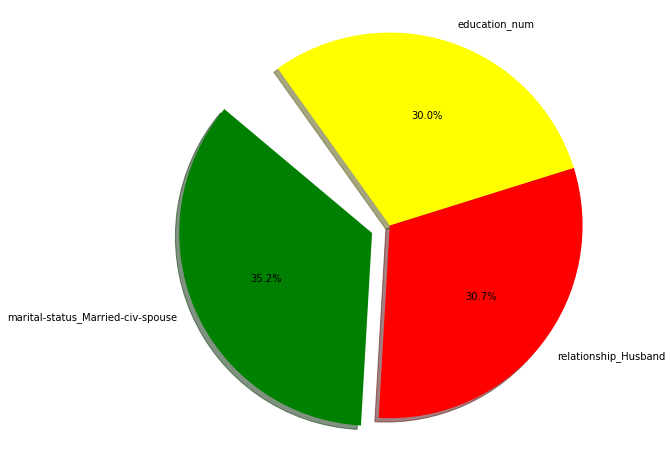

In [209]:
plt.figure(figsize=(8,8))
labels = list(correlation3.index) 
sizes = list(correlation3.get_values())
colors = ['green', 'red', 'yellow']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

# Which three features in the data are most correlated with Ŷ ? Where A = 0

In [210]:
dy_hate1 = pd.DataFrame(y_hate1)
dy_hate1.columns = ['income']
dy_hate1.head()
#concatenation of the two Dataframe 'x_test' and 'dy_hate'

frames4 = [dxt, dy_hate1]
result4 = pd.concat(frames4, axis=1)
#result4.drop(np.where(adult_test['a']==1)
result_A_0 =result4.drop(np.where(adult_test['a'] ==1)[0], axis=0)
                          
#correlation between x_test and dy_hate where A = 0

corr_dxt_y_hate1_A_0 = result_A_0.corr()

In [211]:
corr_in0 = corr_dxt_y_hate1_A_0['income'].abs()
correlation4 = corr_in0.sort_values(ascending= False)[1:4]
correlation4.index

Index(['relationship_Wife', 'marital-status_Married-civ-spouse',
       'education_num'],
      dtype='object')

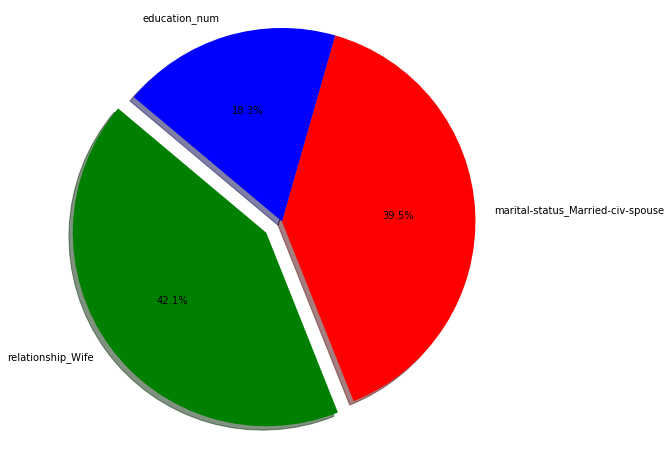

In [212]:
plt.figure(figsize=(8,8))
labels = list(correlation4.index) 
sizes = list(correlation4.get_values())
colors = ['green', 'red', 'blue']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

# Which three features in the data are most correlated with Ŷ ? Where A = 1

In [226]:
dy_hate1 = pd.DataFrame(y_hate1)
dy_hate1.columns = ['income']
dy_hate1.head()
#concatenation of the two Dataframe 'x_test' and 'dy_hate'

frames4 = [dxt, dy_hate1]
result4 = pd.concat(frames4, axis=1)
#result4.drop(np.where(adult_test['a']==1)
result_A_1 =result4.drop(np.where(adult_test['a']==0)[0], axis=0)
                          
#correlation between x_test and dy_hate where A = 0

corr_dxt_y_hate1_A_1 = result_A_1.corr()

In [227]:
corr_in1 = corr_dxt_y_hate1_A_1['income'].abs()
correlation5 = corr_in1.sort_values(ascending= False)[1:4]
correlation5.index

Index(['education_num', 'relationship_Husband',
       'marital-status_Married-civ-spouse'],
      dtype='object')

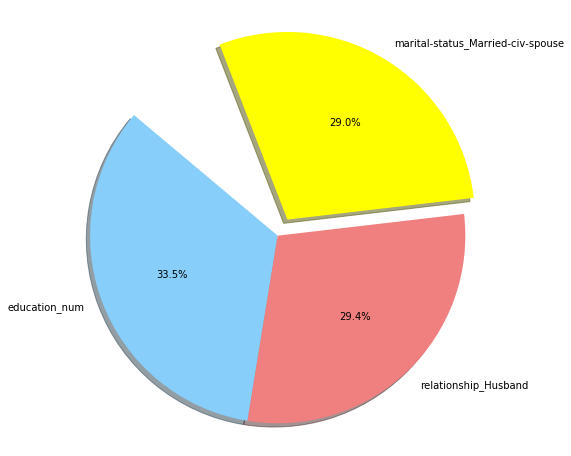

In [228]:
plt.figure(figsize=(8,8))
labels = list(correlation5.index) 
sizes = list(correlation5.get_values())
colors = ['lightskyblue', 'lightcoral', 'yellow']
explode = (0, 0, 0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

## 4 - Prediction of A

# Make a version of this data, but with the attributes called “sex Female” and “sex Male” removed.

In [216]:
A_train = adult_train['a']
A_test = adult_test['a']

# Remove attribus sex_Male' and 'sex_Female' on DataFrame x and y 
df.columns = lists[:len(lists)-1]
df_train_remove = df.drop(['sex_Male', 'sex_Female'],axis=1)
dxt_test_remove = dxt.drop(['sex_Male', 'sex_Female'],axis=1)

# Train a classifier

In [217]:
# Retrain
# Neural Ntework 
# define a sequential model
model_n = Sequential()

# add model layers

n_cols = df_train_remove.shape[1]

model_n.add(Dense(500, activation ='relu', input_dim = n_cols))
model_n.add(Dense(500,activation ='relu'))
model_n.add(Dense(500, activation='relu'))

model_n.add(Dense(1, activation='sigmoid')) 

# compile model_n using as a measure of performance

model_n.compile(optimizer= 'adam', loss ='binary_crossentropy', metrics=['accuracy'])

#train model
model_n.fit(df_train_remove, A_train, batch_size = 128, epochs = 100)

Epoch 1/100
32561/32561 [==============================] - 3s 80us/step - loss: 1.6105 - acc: 0.7259
Epoch 2/100
32561/32561 [==============================] - 2s 66us/step - loss: 1.4962 - acc: 0.7739
Epoch 3/100
32561/32561 [==============================] - 2s 66us/step - loss: 1.4899 - acc: 0.7787
Epoch 4/100
32561/32561 [==============================] - 2s 64us/step - loss: 1.4882 - acc: 0.7768
Epoch 5/100
32561/32561 [==============================] - 2s 64us/step - loss: 1.4853 - acc: 0.7787
Epoch 6/100
32561/32561 [==============================] - 2s 64us/step - loss: 1.4830 - acc: 0.7835
Epoch 7/100
32561/32561 [==============================] - 2s 65us/step - loss: 1.4821 - acc: 0.7826
Epoch 8/100
32561/32561 [==============================] - 2s 64us/step - loss: 1.4830 - acc: 0.7826
Epoch 9/100
32561/32561 [==============================] - 2s 65us/step - loss: 1.4796 - acc: 0.7837
Epoch 10/100
32561/32561 [==============================] - 2s 68us/step - loss: 1.4791 - a

In [123]:
model_n.evaluate(dxt_test_remove, A_test, batch_size = 128)

16281/16281 [==============================] - 0s 21us/step


[1.1759958984766756, 0.8116209077993238]

In [124]:
def accuracy(label, prediction):
    return np.count_nonzero(label == prediction)/(label.shape[0])

In [125]:
A_hate = model_n.predict_classes(dxt_test_remove)
accuracy_score = accuracy(A_test,A_hate)
accuracy_score

0.8116209078066458

#  Report reweighted accuracy on test set 

In [126]:
def reweighted_accuracy(label, prediction):
    n_A_0 = np.count_nonzero(label ==0)
    n_A_1 = np.count_nonzero(label ==1)
    part1 = np.sum((label == prediction)[np.where(label==0)[0]])
    part2 = np.sum((label == prediction)[np.where(label==1)[0]])
    return (part1/n_A_0 + part2/n_A_1)/2

In [127]:
reweighted_accuracy(A_hate, A_test)

0.7893531227284627

# Remove the attributes that you identified in the first part as being most highly correlated with A, and retrain

# Remove the attributes on train 

In [128]:
#concatenation of the two Dataframe 'x' and 'A'
frames_con = [df,da]
result_con = pd.concat(frames_con, axis=1)
result_con.shape
#correlation between x and A
corr_dfda_con = result_con.corr()

In [129]:
corr_incom = corr_dfda['A'].abs()
corr_A_x = corr_incom.sort_values(ascending= False)[1:11]
corr_A_x.index

Index(['sex_Female', 'sex_Male', 'relationship_Husband',
       'marital-status_Married-civ-spouse', 'relationship_Unmarried',
       'relationship_Wife', 'occupation_Adm-clerical', 'hours-per-week',
       'marital-status_Divorced', 'occupation_Craft-repair'],
      dtype='object')

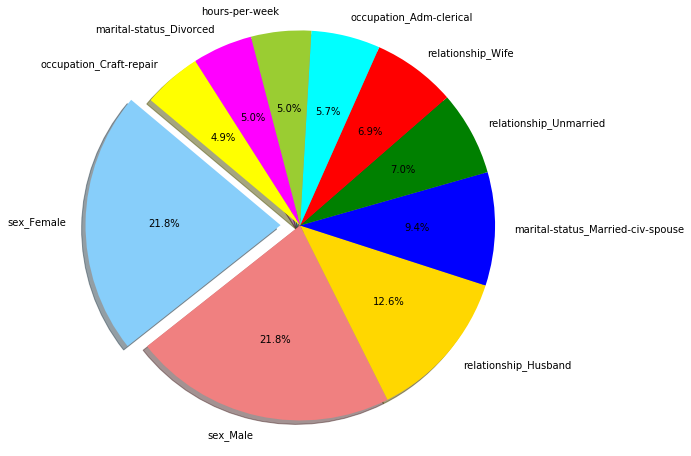

In [130]:
plt.figure(figsize=(8,8))
labels = list(corr_A_x.index) 
sizes = list(corr_A_x.get_values()) #[215, 130, 245, 210]
colors = ['lightskyblue', 'lightcoral', 'gold',  'blue', 'green', 'red', 'cyan','yellowgreen', 'magenta', 'yellow']
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [131]:
# Remove attributes
dfda_remove = df.drop(corr_A_x.index, axis=1)
dfda_remove.shape

(32561, 103)

# Remove the attributes on test

In [132]:
#concatenation of the two Dataframe 'x' and 'A'
frames_con_test = [dxt,dat]
result_con_test = pd.concat(frames_con_test, axis=1)
result_con_test.shape
#correlation between x and A
corr_dxtdat_test = result_con_test.corr()

In [133]:
corr_inc = corr_dxtdat_test['A'].abs()
corr_A_xt = corr_inc.sort_values(ascending= False)[1:11]
corr_A_xt.index

Index(['sex_Female', 'sex_Male', 'relationship_Husband',
       'marital-status_Married-civ-spouse', 'relationship_Wife',
       'relationship_Unmarried', 'occupation_Adm-clerical',
       'marital-status_Divorced', 'hours-per-week', 'occupation_Craft-repair'],
      dtype='object')

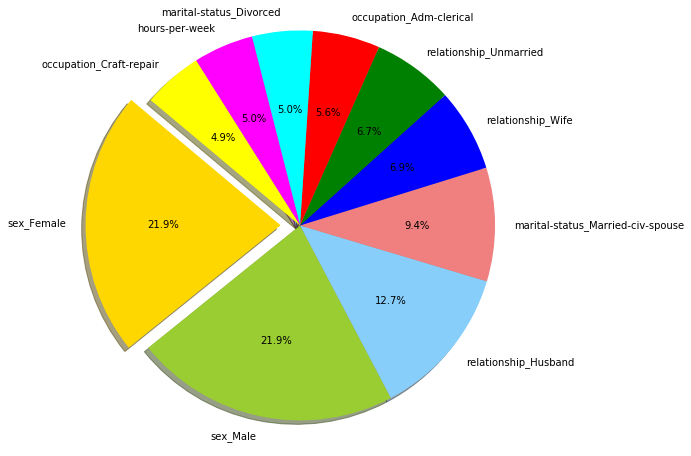

In [134]:
plt.figure(figsize=(8,8))
labels = list(corr_A_xt.index) 
sizes = list(corr_A_xt.get_values()) #[215, 130, 245, 210]
colors = ['gold','yellowgreen', 'lightskyblue', 'lightcoral',  'blue', 'green', 'red', 'cyan', 'magenta', 'yellow']
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [135]:
# Remove attributes
dxtdat_remove = dxt.drop(corr_A_xt.index,axis=1)
dxtdat_remove.shape

(16281, 103)

##  Retrain

In [219]:
# Retrain
# Neural Ntework 
# define a sequential model
model_n = Sequential()

# add model layers

n_cols = dfda_remove.shape[1]

model_n.add(Dense(500, activation ='relu', input_dim = n_cols))
model_n.add(Dense(500,activation ='relu'))
model_n.add(Dense(500, activation='relu'))

model_n.add(Dense(1, activation='sigmoid'))

# compile model_n using as a measure of performance

model_n.compile(optimizer= 'adam', loss ='binary_crossentropy', metrics=['accuracy'])

#train model
model_n.fit(dfda_remove, A_train, batch_size = 128, epochs = 100)

Epoch 1/100
32561/32561 [==============================] - 3s 90us/step - loss: 1.5492 - acc: 0.6682
Epoch 2/100
32561/32561 [==============================] - 2s 74us/step - loss: 1.6726 - acc: 0.6796
Epoch 3/100
32561/32561 [==============================] - 2s 73us/step - loss: 1.6645 - acc: 0.6870
Epoch 4/100
32561/32561 [==============================] - 2s 72us/step - loss: 1.6561 - acc: 0.6940
Epoch 5/100
32561/32561 [==============================] - 2s 75us/step - loss: 1.6492 - acc: 0.6988
Epoch 6/100
32561/32561 [==============================] - 2s 75us/step - loss: 1.6454 - acc: 0.7022
Epoch 7/100
32561/32561 [==============================] - 2s 74us/step - loss: 1.6394 - acc: 0.7062
Epoch 8/100
32561/32561 [==============================] - 2s 72us/step - loss: 1.6342 - acc: 0.7100
Epoch 9/100
32561/32561 [==============================] - 2s 73us/step - loss: 1.6303 - acc: 0.7133
Epoch 10/100
32561/32561 [==============================] - 2s 74us/step - loss: 1.6240 - a

In [220]:
model_n.evaluate(dxtdat_remove, A_test, batch_size = 128)

16281/16281 [==============================] - 0s 30us/step


[2.2110900715259816, 0.6826976230217574]

# Report accuracy.

In [221]:
A_hate1 = model_n.predict_classes(dxtdat_remove)
accuracy_score = accuracy(A_test,A_hate1)
accuracy_score

0.6826976229961305

# Reweighted accuracy on this retrained classifier

In [222]:
reweighted_accuracy(A_hate1, A_test)

0.6455997179987456

# 3 - Representation Learning

In [4]:
# Load the Data: train and test
adult_train = np.load('adult_train.npz')
adult_test = np.load('adult_test.npz')

In [5]:
x_train = adult_train['x']
y_train = adult_train['y']
A_train = adult_train['a']
x_test = adult_test['x']
y_test = adult_test['y']
A_test = adult_test['a']

In [6]:
#Read and associate rows and columns
x_train_data = pd.DataFrame(adult_train['x'])
x_train_data.head()
data_txt = pd.read_csv('adult_headers.txt', header=None) # lire les donnees text
data_txt.columns = ['headers']
lists = []
for header in data_txt['headers']:
    lists.append(header)
x_train_data.columns = lists[:len(lists)-1]# retirer la derniere ligne
#x_train_data.head()

In [7]:
y_train_data = pd.DataFrame(adult_train['y'])
y_train_data.columns = [lists[len(lists)-1]]# associer la derniere ligne a y

In [8]:
#a = adult_train['a']
A_train_data = pd.DataFrame(adult_train['a'])
A_train_data.columns = ['A']

In [9]:
x_test_data = pd.DataFrame(adult_test['x'])
x_test_data.head()
data_txt = pd.read_csv('adult_headers.txt', header=None)
data_txt.columns = ['headers']
liste = []
for header in data_txt['headers']:
    liste.append(header)
x_test_data.columns = liste[:len(liste)-1]

In [10]:
y_test_data = pd.DataFrame(adult_test['y'])
y_test_data.columns = [liste[len(liste)-1]]
#y_test_data.head()

In [11]:
#a = adult_train['a']
A_test_data = pd.DataFrame(adult_test['a'])
A_test_data.columns = ['A']

In [12]:
data = pd.concat((x_train_data, y_train_data, A_train_data), axis = 1)

In [13]:
#Helper function

class PandasDF(TensorDataset):

    def __init__(self, *dataframes):
        tensors = (self._df_to_tensor(df) for df in dataframes)
        super(PandasDF, self).__init__(*tensors)

    def _df_to_tensor(self, df):
        if isinstance(df, pd.Series):
            df = df.to_frame()
        return torch.from_numpy(df.values).float()

In [14]:
class BinaryClassifier(nn.Module):
    def __init__(self, in_features, n_hidden = 128):
        super(BinaryClassifier, self).__init__()
        
        self.linear_network = nn.Sequential(
                                    nn.Linear(in_features, n_hidden),
                                    nn.ReLU(),
                                    nn.Linear(n_hidden, n_hidden),
                                    nn.ReLU(),
                                    nn.Linear(n_hidden, n_hidden),
                                    nn.ReLU(),
                                    nn.Linear(n_hidden, n_hidden),
                                    nn.ReLU(),
                                    nn.Linear(n_hidden, 1))
        
    def forward(self, x):
        return self.linear_network(x)

In [15]:
def train_model(model, criterion, optimizer, dataloader, num_epoch, alpha, withMMD = False):
    model.train()
    
    for epoch in tqdm(range(num_epoch)):
        train_loss = 0.
        for i, (data, label, a) in enumerate(dataloader):
            
            output = model(data)
            if withMMD:
                 loss = criterion(output, label) + alpha * MMD_torch(output, a)
            else:
                loss = criterion(output, label)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item() * len(data)/ float(len(dataloader.dataset))
        
        
        if epoch % 50 == 0:
            print("Epoch: ", epoch, "Loss: ", [train_loss])
        
    print("Training Loss: ", train_loss)
    
    print("Done Training")

    
def test_model(model, dataloader):
    model.eval()
    
    with torch.no_grad():
        accuracy = 0
        n_A_0 = 0
        n_A_1 = 0
        dp_A_0 = 0
        dp_A_1 = 0
        for i, (data, label, sensitive) in enumerate(dataloader):

                output = model(data)
                predicted = torch.tensor((output.squeeze() > 0.).long()).reshape((-1,1))
                
                for item in range(len(sensitive)):
                    if sensitive[item] == 0:
                        n_A_0 += 1
                        dp_A_0 += predicted[item].item()
                    else:
                        n_A_1 += 1
                        dp_A_1 += predicted[item].item()
                
                accuracy += np.equal(predicted, label).sum().item()
        
        mean_dif = dp_A_0 / n_A_0 - dp_A_1 / n_A_1
            
        print("Test accuracy is: ", accuracy / len(dataloader.dataset))
        print("Mean difference: ", mean_dif)
        print("Demographic parity is: ", np.abs(mean_dif))
        
    return accuracy / len(dataloader.dataset) , np.abs(mean_dif)

In [41]:
def train_model_(model, criterion, optimizer, dataloader, num_epoch, alpha, withMMD = False):
    model.train()
    
    for epoch in tqdm(range(num_epoch)):
        train_loss = 0.
        for i, (data, _, label) in enumerate(dataloader):
            
            output = model(data)
            if withMMD:
                loss = criterion(output, label) + alpha * MMD_torch(output, label)
            else:
                loss = criterion(output, label)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item() * len(data)/ float(len(dataloader.dataset))
        
        
        if epoch % 50 == 0:
            print("Epoch: ", epoch, "Loss: ", [train_loss])
        
    print("Training Loss: ", train_loss)
    
    print("Done Training")

    
def test_model_(model, dataloader):
    model.eval()
    
    with torch.no_grad():
        accuracy = 0
        n_A_0 = 0
        n_A_1 = 0
        sum_0 = 0
        sum_1 = 0
        for i, (data, _, sensitive) in enumerate(dataloader):

                output = model(data)
                predicted = torch.tensor((output.squeeze() > 0.).long()).reshape((-1,1))
                
                for item in range(len(sensitive)):
                    if sensitive[item] == 0:
                        n_A_0 += 1
                        sum_0 += predicted[item].item() == sensitive[item].item()
                    else:
                        n_A_1 += 1
                        sum_1 += predicted[item].item() == sensitive[item].item()
                
                accuracy += np.equal(predicted, sensitive).sum().item()
        racc = 0.5 * (sum_0 / n_A_0 + sum_1 / n_A_1)
            
        print("Test accuracy is: ", accuracy / len(dataloader.dataset))
        print("Reweighted accuracy is: ", racc)

## 1- For each feature, fit a Gaussian to that feature for each group – this should give us two Gaussians for each feature.

In [23]:
x_train_A0 = data[data.A !=1].drop(labels =['income', 'A'], axis=1)
x_train_A1 = data[data.A !=0].drop(labels =['income', 'A'], axis=1)

In [24]:
#fit gaussian for A = 0
Gaussian_0 = GaussianMixture(covariance_type = "diag")
Gaussian_0.fit(x_train_A0)

#fit gaussian for A = 1
Gaussian_1 = GaussianMixture(covariance_type = "diag")
Gaussian_1.fit(x_train_A1)


# compute the mean and covariance of gaussian
mean_A0 = Gaussian_0.means_
cov_A_0 = Gaussian_0.covariances_[0]

mean_A1 = Gaussian_1.means_
cov_A_1 = Gaussian_1.covariances_[0]

In [25]:
# Pre-processing the data with learned gaussian means and variances
x_train_data_ = x_train_data.copy()
for row in range(x_train_data.shape[0]):
    if A_train_data.iloc[row].values[0] == 0:
        x_train_data_.iloc[row, ] = (x_train_data.iloc[row, ].values.copy() - mean_A0) /np.sqrt(cov_A_0)
    else:
        x_train_data_.iloc[row, ] = (x_train_data.iloc[row, ].values.copy() - mean_A1) /np.sqrt(cov_A_1)

In [26]:
data_ = pd.concat((x_train_data, A_train_data), axis = 1)

# get the features for A = 0
x_train_A0_ = data_[data_.A != 1].drop(labels = ['A'],axis=1)

# get the features for A = 1
x_train_A1_ = data_[data_.A != 0].drop(labels= ['A'],axis=1)

#assert
np.testing.assert_array_almost_equal(x_train_A0_.mean(axis = 0).values, x_train_A0_.mean(axis = 0).values, 5)

In [27]:
train_data_t  = PandasDF(x_train_data_, y_train_data, A_train_data)
train_loader_ = DataLoader(train_data_t, batch_size = 64, shuffle = True, drop_last = True) 

In [28]:
# learn a classifier g to predict Y from this pre-processed data

in_features = train_loader_.dataset.tensors[0].shape[-1]
g = BinaryClassifier(in_features)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(g.parameters())
num_epoch = 200

train_model(g, criterion, optimizer, train_loader_, num_epoch, 0, False)

  0%|          | 1/200 [00:01<04:35,  1.38s/it]

Epoch:  0 Loss:  [0.3635145597246128]


 26%|██▌       | 51/200 [01:23<04:19,  1.74s/it]

Epoch:  50 Loss:  [0.16931600299903277]


 50%|█████     | 101/200 [02:52<02:57,  1.79s/it]

Epoch:  100 Loss:  [0.14476362878576776]


 76%|███████▌  | 151/200 [04:24<01:32,  1.88s/it]

Epoch:  150 Loss:  [0.13514721995105014]


100%|██████████| 200/200 [05:54<00:00,  1.78s/it]

Training Loss:  0.12611190760400345
Done Training


In [29]:
data_test = pd.concat((x_test_data, y_test_data, A_test_data), axis = 1)

In [30]:
x_test_A0 = data_test[data_test.A != 1].drop(labels = ['income','A'],axis=1)
x_test_A1 = data_test[data_test.A != 0].drop(labels = ['income', 'A'],axis=1)

In [31]:
#fit gaussian for A = 0
Gaussian_0 = GaussianMixture(covariance_type = "diag")
Gaussian_0.fit(x_test_A0)

#fit gaussian for A = 1
Gaussian_1 = GaussianMixture(covariance_type = "diag")
Gaussian_1.fit(x_test_A1)


# compute the mean and covariance of gaussian
mean_test_A0 = Gaussian_0.means_
cov_test_A0 = Gaussian_0.covariances_[0]

mean_test_A1 = Gaussian_1.means_
cov_test_A1 = Gaussian_1.covariances_[0]

In [32]:
# Pre-processing the data with learned gaussian means and variances
x_test_data_ = x_test_data.copy()
for row in range(x_test_data.shape[0]):
    if A_test_data.iloc[row].values[0] == 0:
        x_test_data_.iloc[row, ] = (x_test_data.iloc[row, ].values.copy() - mean_test_A0) /np.sqrt(cov_test_A0)
    else:
        x_test_data_.iloc[row, ] = (x_test_data.iloc[row, ].values.copy() - mean_test_A1) /np.sqrt(cov_test_A1)

In [37]:
test_data_t  = PandasDF(x_test_data_, y_test_data, A_test_data)
test_loader_ = DataLoader(test_data_t, batch_size = 64, shuffle = True, drop_last = False) 

In [39]:
test_model(g, test_loader_)

Test accuracy is:  0.8283274983109146
Mean difference:  -0.17053936960928495
Demographic parity is:  0.17053936960928495


(0.8283274983109146, 0.17053936960928495)

In [40]:
# learn a classifier h to predict A from this preprocessed data

in_features = train_loader_.dataset.tensors[0].shape[-1]
h = BinaryClassifier(in_features)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(h.parameters())
num_epoch = 200

train_model_(h, criterion, optimizer, train_loader_, num_epoch, 0, False)

  0%|          | 1/200 [00:01<04:37,  1.39s/it]

Epoch:  0 Loss:  [0.16290298974834394]


 26%|██▌       | 51/200 [01:35<05:43,  2.30s/it]

Epoch:  50 Loss:  [9.152765591629338e-11]


 50%|█████     | 101/200 [03:30<03:38,  2.21s/it]

Epoch:  100 Loss:  [1.6511572927422475e-09]


 76%|███████▌  | 151/200 [05:33<02:08,  2.63s/it]

Epoch:  150 Loss:  [1.8488543016492242e-08]


100%|██████████| 200/200 [08:06<00:00,  3.43s/it]

Training Loss:  0.0
Done Training


In [42]:
test_model_(h, test_loader_)

Test accuracy is:  0.9996928935569068
Reweighted accuracy is:  0.9996774106426716


# 2- Train a neural network with at least one hidden layer as your binary classifier

In [43]:
train_data_t  = PandasDF(x_train_data, y_train_data, A_train_data)
train_loader = DataLoader(train_data_t, batch_size = 64, shuffle = True, drop_last = True) 

In [47]:
# predicting Y with MMD

in_features = train_loader.dataset.tensors[0].shape[-1]
model = BinaryClassifier(in_features)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters())
num_epoch = 200
alpha = 0.1
train_model(model, criterion, optimizer, train_loader, num_epoch, alpha, True)

  0%|          | 1/200 [00:02<07:33,  2.28s/it]

Epoch:  0 Loss:  [0.46374449415503616]


 26%|██▌       | 51/200 [02:46<08:35,  3.46s/it]

Epoch:  50 Loss:  [0.28273984660336676]


 50%|█████     | 101/200 [05:44<06:01,  3.65s/it]

Epoch:  100 Loss:  [0.23803637224781218]


 76%|███████▌  | 151/200 [08:55<03:09,  3.88s/it]

Epoch:  150 Loss:  [0.2110540338261248]


100%|██████████| 200/200 [12:12<00:00,  4.01s/it]

Training Loss:  0.19884503257863706
Done Training


In [49]:
test_data_t  = PandasDF(x_test_data, y_test_data, A_test_data)
test_loader = DataLoader(test_data_t, batch_size = 64, shuffle = True, drop_last = False) 

In [51]:
# predicting A with MMD
in_features = train_loader.dataset.tensors[0].shape[-1]
model1 = BinaryClassifier(in_features)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model1.parameters())
num_epoch = 200
alpha = 0.1
train_model_(model1, criterion, optimizer, train_loader, num_epoch, alpha, True)

  0%|          | 1/200 [00:02<07:19,  2.21s/it]

Epoch:  0 Loss:  [0.2676047471278326]


 26%|██▌       | 51/200 [02:52<09:17,  3.74s/it]

Epoch:  50 Loss:  [0.0525916479849441]


 50%|█████     | 101/200 [06:28<07:34,  4.59s/it]

Epoch:  100 Loss:  [0.05251583257554324]


 76%|███████▌  | 151/200 [10:39<04:10,  5.12s/it]

Epoch:  150 Loss:  [0.05880636581148543]


100%|██████████| 200/200 [15:13<00:00,  5.65s/it]

Training Loss:  0.05219067713925171
Done Training


In [52]:
test_model_(model1, test_loader)

Test accuracy is:  0.9807751366623672
Reweighted accuracy is:  0.9711307876775503


# 3- Try to find the useful range of the hyperparameter alpha

In [54]:
alpha_range = np.array([0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0])
criterion = nn.BCEWithLogitsLoss()
in_features = train_loader.dataset.tensors[0].shape[-1]

In [58]:
# generate a range of values for accuracy anf dp using different alpha values
accuracy_range = []
dp_range = []
for alpha in alpha_range:
    #print("###############################")
    print("for value of alpha=", alpha)
        #
        print("######################")
    model_alpha = BinaryClassifier(in_features)
    optimizer = optim.Adam(model_alpha.parameters())
    train_model(model_alpha, criterion, optimizer, train_loader, 100, alpha, True)
    acc , dp = test_model(model_alpha, test_loader)
    accuracy_range.append(acc)
    dp_range.append(dp)

  0%|          | 0/100 [00:00<?, ?it/s]

for value of alpha= 0.0001


  1%|          | 1/100 [00:02<03:34,  2.17s/it]

Epoch:  0 Loss:  [0.41305898572247474]


 51%|█████     | 51/100 [02:41<02:41,  3.29s/it]

Epoch:  50 Loss:  [0.2596730483712854]


100%|██████████| 100/100 [05:26<00:00,  3.37s/it]


Training Loss:  0.2179871876604936
Done Training


  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy is:  0.8430071862907684
Mean difference:  -0.18214738876132414
Demographic parity is:  0.18214738876132414
for value of alpha= 0.0005


  1%|          | 1/100 [00:03<05:07,  3.11s/it]

Epoch:  0 Loss:  [0.4463782340506914]


 51%|█████     | 51/100 [02:54<02:46,  3.40s/it]

Epoch:  50 Loss:  [0.26234187740376197]


100%|██████████| 100/100 [05:49<00:00,  3.24s/it]


Training Loss:  0.2201583548972547
Done Training


  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy is:  0.8471838339168356
Mean difference:  -0.18364636807341211
Demographic parity is:  0.18364636807341211
for value of alpha= 0.001


  1%|          | 1/100 [00:02<04:41,  2.85s/it]

Epoch:  0 Loss:  [0.43642122769457525]


 51%|█████     | 51/100 [02:55<02:41,  3.30s/it]

Epoch:  50 Loss:  [0.26018453967472055]


100%|██████████| 100/100 [05:29<00:00,  3.24s/it]


Training Loss:  0.21818872281731158
Done Training


  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy is:  0.8459554081444629
Mean difference:  -0.18714300128108308
Demographic parity is:  0.18714300128108308
for value of alpha= 0.005


  1%|          | 1/100 [00:02<04:15,  2.58s/it]

Epoch:  0 Loss:  [0.4453488151306841]


 51%|█████     | 51/100 [02:51<03:11,  3.91s/it]

Epoch:  50 Loss:  [0.2643031868806201]


100%|██████████| 100/100 [05:49<00:00,  3.94s/it]


Training Loss:  0.2227200266660379
Done Training


  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy is:  0.8387076960874639
Mean difference:  -0.19410997338975397
Demographic parity is:  0.19410997338975397
for value of alpha= 0.01


  1%|          | 1/100 [00:02<04:44,  2.87s/it]

Epoch:  0 Loss:  [0.43097331303423436]


 51%|█████     | 51/100 [02:57<02:38,  3.23s/it]

Epoch:  50 Loss:  [0.262073533598927]


100%|██████████| 100/100 [05:39<00:00,  3.19s/it]


Training Loss:  0.21804588164163177
Done Training


  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy is:  0.843252871445243
Mean difference:  -0.18667311794423364
Demographic parity is:  0.18667311794423364
for value of alpha= 0.05


  1%|          | 1/100 [00:02<04:54,  2.97s/it]

Epoch:  0 Loss:  [0.43765831081518897]


 51%|█████     | 51/100 [02:42<02:35,  3.17s/it]

Epoch:  50 Loss:  [0.2675338274855376]


100%|██████████| 100/100 [05:25<00:00,  3.34s/it]


Training Loss:  0.224516600422578
Done Training


  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy is:  0.8441741907745225
Mean difference:  -0.17112243057232923
Demographic parity is:  0.17112243057232923
for value of alpha= 0.1


  1%|          | 1/100 [00:02<04:14,  2.57s/it]

Epoch:  0 Loss:  [0.4661104288906927]


 51%|█████     | 51/100 [02:43<02:39,  3.26s/it]

Epoch:  50 Loss:  [0.2825929822963053]


100%|██████████| 100/100 [05:26<00:00,  3.39s/it]


Training Loss:  0.23743363487892916
Done Training


  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy is:  0.8427615011362939
Mean difference:  -0.1907259063127738
Demographic parity is:  0.1907259063127738
for value of alpha= 0.5


  1%|          | 1/100 [00:02<04:25,  2.68s/it]

Epoch:  0 Loss:  [0.48763957617744985]


 51%|█████     | 51/100 [02:59<03:06,  3.81s/it]

Epoch:  50 Loss:  [0.3335011117504692]


100%|██████████| 100/100 [06:04<00:00,  3.97s/it]


Training Loss:  0.30880891050659315
Done Training


  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy is:  0.8506234260794792
Mean difference:  -0.14118080800977578
Demographic parity is:  0.14118080800977578
for value of alpha= 1.0


  1%|          | 1/100 [00:02<04:36,  2.79s/it]

Epoch:  0 Loss:  [0.5447845001492507]


 51%|█████     | 51/100 [06:21<12:40, 15.53s/it]

Epoch:  50 Loss:  [0.37936402647110284]


100%|██████████| 100/100 [13:49<00:00,  3.61s/it]


Training Loss:  0.36585264623884534
Done Training


  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy is:  0.8503777409250046
Mean difference:  -0.11244846876430006
Demographic parity is:  0.11244846876430006
for value of alpha= 5.0


  1%|          | 1/100 [00:02<03:46,  2.29s/it]

Epoch:  0 Loss:  [0.63346693684994]


 51%|█████     | 51/100 [03:05<03:10,  3.89s/it]

Epoch:  50 Loss:  [0.551472252341732]


100%|██████████| 100/100 [06:16<00:00,  3.99s/it]


Training Loss:  0.5511587160576226
Done Training


  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy is:  0.7637737239727289
Mean difference:  0.0
Demographic parity is:  0.0
for value of alpha= 10.0


  1%|          | 1/100 [00:02<03:46,  2.29s/it]

Epoch:  0 Loss:  [0.7342844362915858]


 51%|█████     | 51/100 [03:04<03:08,  3.84s/it]

Epoch:  50 Loss:  [0.551364172962461]


100%|██████████| 100/100 [06:13<00:00,  3.97s/it]


Training Loss:  0.5512816981320918
Done Training
Test accuracy is:  0.7637737239727289
Mean difference:  0.0
Demographic parity is:  0.0


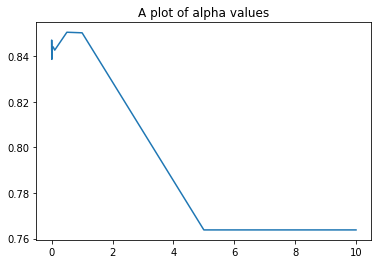

In [232]:
# generate a plot of acc and dp against range of alpha values
plt.plot(alpha_range, accuracy_range)
plt.title("A plot of alpha values")

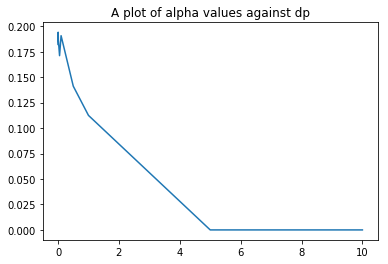

In [233]:
plt.plot(alpha_range, dp_range)
plt.title("A plot of alpha values against dp")

In [236]:
alpha_range_2 = np.array([0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0])

In [237]:
# generate a range of values for accuracy anf dp using different alpha values
accuracy_range_2 = []
dp_range_2 = []
for alpha in alpha_range_2:
    #print("###############################")
    print("for value of alpha=", alpha)
    #print("###############################")
    model_alpha = BinaryClassifier(in_features)
    
    optimizer = optim.Adam(model_alpha.parameters())
    train_model(model_alpha, criterion, optimizer, train_loader, 100, alpha, True)
    acc , dp = test_model(model_alpha, test_loader)
    accuracy_range_2.append(acc)
    dp_range_2.append(dp)

  0%|          | 0/100 [00:00<?, ?it/s]

for value of alpha= 1e-05


  1%|          | 1/100 [00:02<04:25,  2.68s/it]

Epoch:  0 Loss:  [0.41251616113173667]


 51%|█████     | 51/100 [02:57<02:57,  3.61s/it]

Epoch:  50 Loss:  [0.26025692035113523]


100%|██████████| 100/100 [05:52<00:00,  3.54s/it]


Training Loss:  0.21950022977538025
Done Training


  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy is:  0.8419630243842516
Mean difference:  -0.16741534099537198
Demographic parity is:  0.16741534099537198
for value of alpha= 5e-05


  1%|          | 1/100 [00:02<04:49,  2.92s/it]

Epoch:  0 Loss:  [0.41016783895446]


 51%|█████     | 51/100 [03:04<02:58,  3.64s/it]

Epoch:  50 Loss:  [0.2641169910132746]


100%|██████████| 100/100 [05:59<00:00,  3.72s/it]


Training Loss:  0.22881449065913284
Done Training


  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy is:  0.8334254652662613
Mean difference:  -0.20165205701991742
Demographic parity is:  0.20165205701991742
for value of alpha= 0.0001


  1%|          | 1/100 [00:03<05:20,  3.23s/it]

Epoch:  0 Loss:  [0.40309228381903783]


 51%|█████     | 51/100 [03:06<02:59,  3.67s/it]

Epoch:  50 Loss:  [0.265604945190679]


100%|██████████| 100/100 [06:07<00:00,  3.74s/it]


Training Loss:  0.22154422014432745
Done Training


  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy is:  0.8467538848965052
Mean difference:  -0.1584195287204151
Demographic parity is:  0.1584195287204151
for value of alpha= 0.0005


  1%|          | 1/100 [00:03<05:10,  3.14s/it]

Epoch:  0 Loss:  [0.43415773555214043]


 51%|█████     | 51/100 [03:03<02:49,  3.46s/it]

Epoch:  50 Loss:  [0.2619194126419107]


100%|██████████| 100/100 [05:59<00:00,  3.81s/it]


Training Loss:  0.21965005697201942
Done Training


  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy is:  0.8433142927338616
Mean difference:  -0.18428237435550923
Demographic parity is:  0.18428237435550923
for value of alpha= 0.001


  1%|          | 1/100 [00:03<05:18,  3.21s/it]

Epoch:  0 Loss:  [0.4346711758090225]


 51%|█████     | 51/100 [03:13<03:12,  3.94s/it]

Epoch:  50 Loss:  [0.25861404507456215]


100%|██████████| 100/100 [06:14<00:00,  3.58s/it]


Training Loss:  0.22089392214602543
Done Training


  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy is:  0.8414716540753026
Mean difference:  -0.169149287454864
Demographic parity is:  0.169149287454864
for value of alpha= 0.005


  1%|          | 1/100 [00:03<05:07,  3.10s/it]

Epoch:  0 Loss:  [0.42324476501857544]


 51%|█████     | 51/100 [03:13<03:07,  3.82s/it]

Epoch:  50 Loss:  [0.26370460037180377]


100%|██████████| 100/100 [06:28<00:00,  4.01s/it]


Training Loss:  0.22138042507943095
Done Training


  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy is:  0.8402432283029297
Mean difference:  -0.19347274411664886
Demographic parity is:  0.19347274411664886
for value of alpha= 0.01


  1%|          | 1/100 [00:03<05:14,  3.18s/it]

Epoch:  0 Loss:  [0.40595465865380775]


 51%|█████     | 51/100 [03:15<03:03,  3.75s/it]

Epoch:  50 Loss:  [0.2616065801249861]


100%|██████████| 100/100 [06:19<00:00,  3.95s/it]


Training Loss:  0.22375038118913945
Done Training


  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy is:  0.8458939868558443
Mean difference:  -0.18234775545479467
Demographic parity is:  0.18234775545479467
for value of alpha= 0.05


  1%|          | 1/100 [00:03<04:59,  3.03s/it]

Epoch:  0 Loss:  [0.46279928556169114]


 51%|█████     | 51/100 [03:08<03:13,  3.96s/it]

Epoch:  50 Loss:  [0.2668958940544349]


100%|██████████| 100/100 [06:14<00:00,  3.67s/it]


Training Loss:  0.2216097005136088
Done Training


  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy is:  0.842577237270438
Mean difference:  -0.17708476652592076
Demographic parity is:  0.17708476652592076
for value of alpha= 0.1


  1%|          | 1/100 [00:03<05:03,  3.07s/it]

Epoch:  0 Loss:  [0.45080636066856056]


 51%|█████     | 51/100 [03:02<02:50,  3.48s/it]

Epoch:  50 Loss:  [0.28077607567672574]


100%|██████████| 100/100 [05:53<00:00,  3.44s/it]


Training Loss:  0.24162815796106527
Done Training


  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy is:  0.8384620109329893
Mean difference:  -0.17607187518153772
Demographic parity is:  0.17607187518153772
for value of alpha= 0.5


  1%|          | 1/100 [00:02<04:11,  2.54s/it]

Epoch:  0 Loss:  [0.4898282641813285]


 51%|█████     | 51/100 [02:53<02:57,  3.62s/it]

Epoch:  50 Loss:  [0.3349955350445251]


100%|██████████| 100/100 [06:00<00:00,  3.94s/it]


Training Loss:  0.3100681721712004
Done Training


  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy is:  0.8511762176770469
Mean difference:  -0.15997665106333972
Demographic parity is:  0.15997665106333972
for value of alpha= 1.0


  1%|          | 1/100 [00:02<04:21,  2.65s/it]

Epoch:  0 Loss:  [0.5388917811383107]


 51%|█████     | 51/100 [03:01<03:02,  3.72s/it]

Epoch:  50 Loss:  [0.37901458720903736]


100%|██████████| 100/100 [06:11<00:00,  3.96s/it]


Training Loss:  0.3616548409454216
Done Training


  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy is:  0.8487193661323015
Mean difference:  -0.11210062973845317
Demographic parity is:  0.11210062973845317
for value of alpha= 5.0


  1%|          | 1/100 [00:02<04:29,  2.72s/it]

Epoch:  0 Loss:  [0.6308879825934957]


 51%|█████     | 51/100 [03:29<03:35,  4.39s/it]

Epoch:  50 Loss:  [0.5511051146463708]


100%|██████████| 100/100 [07:09<00:00,  4.44s/it]


Training Loss:  0.5513233073985437
Done Training


  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy is:  0.7637737239727289
Mean difference:  0.0
Demographic parity is:  0.0
for value of alpha= 10.0


  1%|          | 1/100 [00:02<04:20,  2.63s/it]

Epoch:  0 Loss:  [0.7392801638189326]


 51%|█████     | 51/100 [03:29<03:36,  4.41s/it]

Epoch:  50 Loss:  [0.5513607442336892]


100%|██████████| 100/100 [07:01<00:00,  4.37s/it]


Training Loss:  0.5512641205446009
Done Training


  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy is:  0.7637737239727289
Mean difference:  0.0
Demographic parity is:  0.0
for value of alpha= 50.0


  1%|          | 1/100 [00:02<04:31,  2.74s/it]

Epoch:  0 Loss:  [1.0714792122891714]


 51%|█████     | 51/100 [03:26<03:31,  4.32s/it]

Epoch:  50 Loss:  [0.5513939863194234]


100%|██████████| 100/100 [06:58<00:00,  4.49s/it]


Training Loss:  0.5512483951255447
Done Training


  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy is:  0.7637737239727289
Mean difference:  0.0
Demographic parity is:  0.0
for value of alpha= 100.0


  1%|          | 1/100 [00:02<04:34,  2.77s/it]

Epoch:  0 Loss:  [1.494412493205641]


 51%|█████     | 51/100 [03:33<03:28,  4.25s/it]

Epoch:  50 Loss:  [0.5513008489409896]


100%|██████████| 100/100 [07:02<00:00,  4.22s/it]


Training Loss:  0.5512331677927098
Done Training
Test accuracy is:  0.7637737239727289
Mean difference:  0.0
Demographic parity is:  0.0


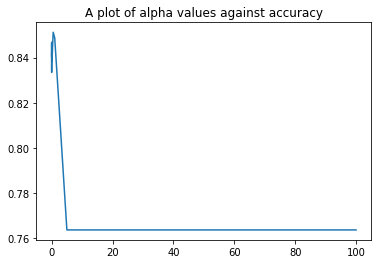

In [238]:
# generate a plot of acc and dp against range of alpha values
plt.plot(alpha_range_2, accuracy_range_2)
plt.title("A plot of alpha values against accuracy")

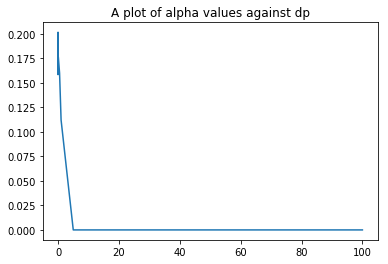

In [239]:
plt.plot(alpha_range_2, dp_range_2)
plt.title("A plot of alpha values against dp")